In [1]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Step 2: Importing dataset**

In [3]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='Age'>

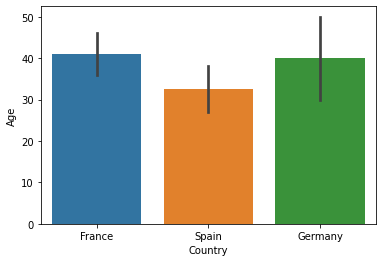

In [5]:
sns.barplot(df['Country'],df['Age'])

C:\Users\sakth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='Salary'>

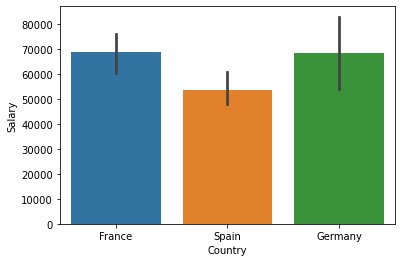

In [6]:
sns.barplot(df['Country'],df['Salary'])

In [7]:
df['Age']=df.groupby('Country')['Age'].apply(lambda x:x.fillna((x.mean())))
df['Salary']=df.groupby('Country')['Salary'].apply(lambda x:x.fillna((x.mean())))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


**Step 4: Encoding categorical data**

In [9]:
df['Purchased']=df['Purchased'].replace({'Yes':1,'No':0})

**Step 5: Creating a dummy variable**

In [10]:
dt=df
df=pd.get_dummies(df,columns=['Country'])
df

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,68500.0,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,32.5,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


**Step 7: Feature Scaling**

In [11]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [12]:
func=MinMaxScaler(feature_range=[0,1])
x_tr=func.fit_transform(x)

In [13]:
x_tr

array([[0.73913043, 0.68571429, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.13043478, 0.17142857, 0.        , 1.        , 0.        ],
       [0.47826087, 0.37142857, 0.        , 0.        , 1.        ],
       [0.56521739, 0.58571429, 0.        , 1.        , 0.        ],
       [0.34782609, 0.28571429, 1.        , 0.        , 0.        ],
       [0.23913043, 0.11428571, 0.        , 0.        , 1.        ],
       [0.91304348, 0.88571429, 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.43478261, 0.54285714, 1.        , 0.        , 0.        ]])

**Step 6: Splitting the datasets into training sets and Test sets**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_tr,y,test_size=.25,random_state=5)